Paola Della Foglia

matr. 961014

Esercitazione numerica 11

Esercizio 11.3

In questo esercizio cercheremo di estendere il modello di reti neurali NN implementato negli esercizi precedenti per adattarlo ad una funzione trigonometrica $f(x,y)=sin(x^2+y^2)$ in $2D$ per $x∈[−3/2,3/2]$ e $y∈[−3/2,3/2]$ 

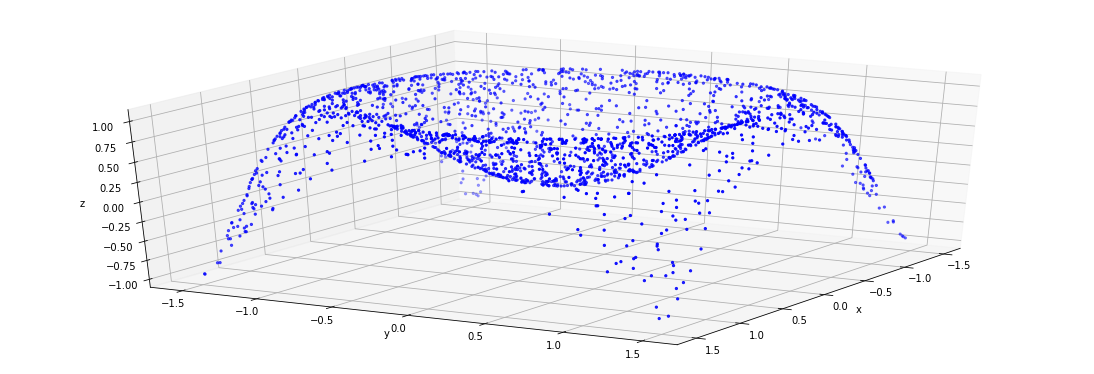

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# generate training inputs
plt.rcParams['figure.figsize'] = [15, 5]
np.random.seed(0)
x_train = np.c_[np.random.uniform(-1.5, 1.5, 20000),np.random.uniform(-1.5, 1.5, 20000)]
x_valid = np.c_[np.random.uniform(-1.5, 1.5, 2000),np.random.uniform(-1.5, 1.5, 2000)]

y_target = np.sin(x_valid[:,0]**2  + x_valid[:,1]**2)

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(np.sin(x_train[:,0]**2  + x_train[:,1]**2), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(np.sin(x_valid[:,0]**2  + x_valid[:,1]**2), sigma)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_valid[:,0], x_valid[:,1], y_target, marker='.', color='blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, 30)
plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 481
Trainable params: 481
Non-trainable params: 0
________________________________________________________

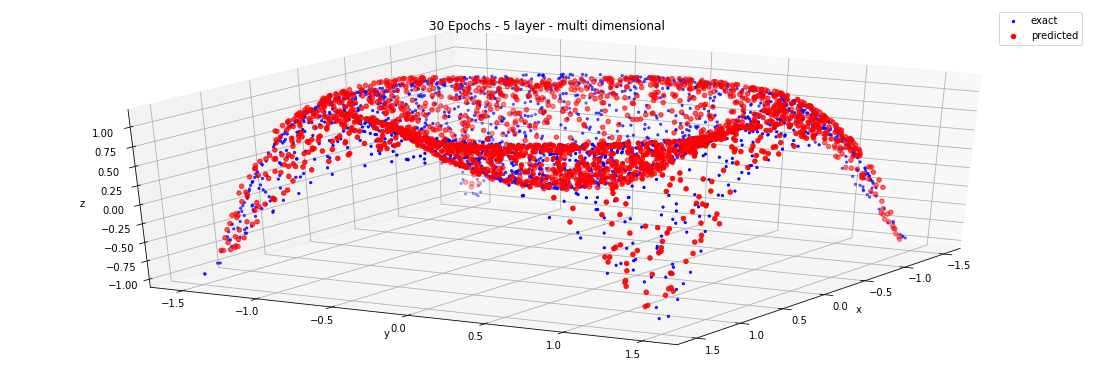

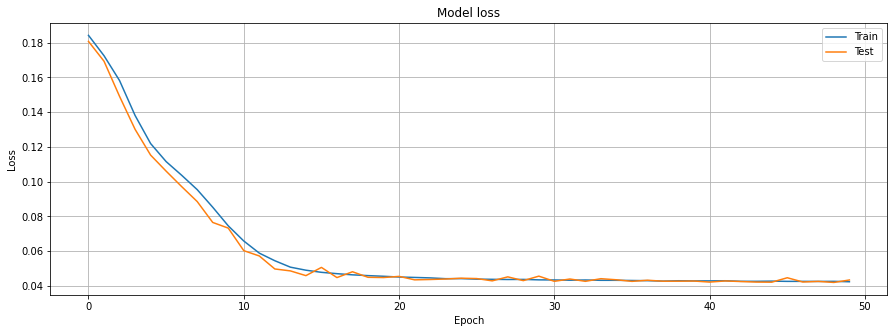

In [6]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(2,), activation='relu'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='elu'))
model.add(Dense(10, activation='elu'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose =0)

plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = Axes3D(fig)

ax = Axes3D(fig)
ax.scatter(x_valid[:,0], x_valid[:,1], y_target, marker='.', color='blue', label='exact')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, 30)
x_predicted = np.c_[np.random.uniform(-1.5, 1.5, 2000),np.random.uniform(-1.5, 1.5, 2000)]
y_predicted = model.predict(x_predicted)
ax.scatter(x_predicted[:,0], x_predicted[:,1], y_predicted,color='r', label='predicted')
ax.grid(True)
ax.set_title('30 Epochs - 5 layer - multi dimensional')
ax.legend()
plt.show()
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

Dai grafici sovrastanti possiamo concludere che la previsione sembra buona. Il training è stato provato con punti distribuiti secondo una distribuzione normale centrata nel valore esatto di $f(x,y)$ e con $\sigma=0,2$.